# Task - 4



## **Task has been mentioned at the end of this notebook**  

## 1. Basic Pandas Operations

In [1]:
# Import all the required Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,auc,roc_curve,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV


In [2]:
# Read the dataset and display the head. You will get the output as mentioned below

df=pd.read_csv(r"C:\Users\Lenovo\classfiles\Machine learning\train.csv")
df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,Owned,Individual,36,36,No,X1,14+,2.0,16,13320.0,0
1,33499,33500,C3,2955,Owned,Individual,66,66,No,X6,10,1.0,19,16152.0,0
2,7997,7998,C1,1542,Rented,Individual,24,24,No,NaN,3,1.0,16,7310.0,0
3,33032,33033,C26,772,Rented,Individual,75,75,No,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,Owned,Joint,59,58,Yes,X1,14+,4.0,17,23673.0,0


In [3]:
# Check the shape of the dataframe

df.shape

(10000, 15)

In [4]:
# On the dataframe apply info() function and observe the Dtypes and Missing Values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  object 
 5   Reco_Insurance_Type      10000 non-null  object 
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  object 
 9   Health Indicator         7671 non-null   object 
 10  Holding_Policy_Duration  5946 non-null   object 
 11  Holding_Policy_Type      5946 non-null   float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [5]:
df.isna().sum()

Unnamed: 0                    0
ID                            0
City_Code                     0
Region_Code                   0
Accomodation_Type             0
Reco_Insurance_Type           0
Upper_Age                     0
Lower_Age                     0
Is_Spouse                     0
Health Indicator           2329
Holding_Policy_Duration    4054
Holding_Policy_Type        4054
Reco_Policy_Cat               0
Reco_Policy_Premium           0
Response                      0
dtype: int64

## 2. Cleaning the Data

In [6]:
# Impute the Null values in Health Indicator, Holding_Policy_Duration and Holding_Policy_Type

df['Holding_Policy_Type'].fillna(df['Holding_Policy_Type'].mean(), inplace = True)
df['Holding_Policy_Duration'].fillna(df['Holding_Policy_Duration'].mode()[0], inplace = True) 
df['Health Indicator'].fillna(df['Health Indicator'].mode()[0], inplace = True)
print(df.isnull().sum())

Unnamed: 0                 0
ID                         0
City_Code                  0
Region_Code                0
Accomodation_Type          0
Reco_Insurance_Type        0
Upper_Age                  0
Lower_Age                  0
Is_Spouse                  0
Health Indicator           0
Holding_Policy_Duration    0
Holding_Policy_Type        0
Reco_Policy_Cat            0
Reco_Policy_Premium        0
Response                   0
dtype: int64


In [7]:
# Check again Holding_Policy_Duration is in object column convert that into int


df['Holding_Policy_Duration'].value_counts()

14+    4952
1       867
2       790
3       696
4       530
5       461
6       374
7       320
8       254
9       205
10      166
12      104
13      103
11       89
14       89
Name: Holding_Policy_Duration, dtype: int64

In [8]:
df['Holding_Policy_Duration'] = df['Holding_Policy_Duration'].replace(['1','2','3','4','5','6','7','8','9','10','11','12','13','14'],'14-')
df['Holding_Policy_Duration'].value_counts()

14-    5048
14+    4952
Name: Holding_Policy_Duration, dtype: int64

In [9]:
# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
df['Holding_Policy_Duration'] = label_encoder.fit_transform(df['Holding_Policy_Duration'])
df['Holding_Policy_Duration'].unique()

array([0, 1])

In [10]:
# Observe that ['Accomodation_Type','Reco_Insurance_Type','Is_Spouse'] 
# above these Object columns have two values - Yes and No

print(df['Accomodation_Type'].head())
print(df['Reco_Insurance_Type'].head())
print(df['Is_Spouse'].head())

0     Owned
1     Owned
2    Rented
3    Rented
4     Owned
Name: Accomodation_Type, dtype: object
0    Individual
1    Individual
2    Individual
3    Individual
4         Joint
Name: Reco_Insurance_Type, dtype: object
0     No
1     No
2     No
3     No
4    Yes
Name: Is_Spouse, dtype: object


In [11]:
# Converting all the Yes to 1 and No to 0. 



# Write a for loop to iterate over the list given above
# For each feature use pandas 'apply()' to convert all the 'Yes' to 1 and 'No' to 0

%timeit
df['Is_Spouse']=df['Is_Spouse'].apply(lambda x:0 if x=='No' else 1)


    


In [12]:
%timeit
df['Accomodation_Type']=df['Accomodation_Type'].apply(lambda x:0 if x=='Rented' else 1)
df['Accomodation_Type']

0       1
1       1
2       0
3       0
4       1
       ..
9995    1
9996    0
9997    1
9998    0
9999    1
Name: Accomodation_Type, Length: 10000, dtype: int64

In [13]:
%timeit
df['Reco_Insurance_Type']=df['Reco_Insurance_Type'].apply(lambda x:0 if x=='Joint' else 1)
df['Reco_Insurance_Type']

0       1
1       1
2       1
3       1
4       0
       ..
9995    0
9996    1
9997    1
9998    1
9999    0
Name: Reco_Insurance_Type, Length: 10000, dtype: int64

In [14]:
# Now again having a look at all those columns to see if everything went well

df.head()

,Unnamed: 0,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27385,27386,C3,64,1,1,36,36,0,X1,0,2.0,16,13320.0,0
1,33499,33500,C3,2955,1,1,66,66,0,X6,1,1.0,19,16152.0,0
2,7997,7998,C1,1542,0,1,24,24,0,X1,1,1.0,16,7310.0,0
3,33032,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30516,30517,C2,1510,1,0,59,58,1,X1,0,4.0,17,23673.0,0


In [15]:
# Observe that all those columns are now converted from Object to Int64

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               10000 non-null  int64  
 1   ID                       10000 non-null  int64  
 2   City_Code                10000 non-null  object 
 3   Region_Code              10000 non-null  int64  
 4   Accomodation_Type        10000 non-null  int64  
 5   Reco_Insurance_Type      10000 non-null  int64  
 6   Upper_Age                10000 non-null  int64  
 7   Lower_Age                10000 non-null  int64  
 8   Is_Spouse                10000 non-null  int64  
 9   Health Indicator         10000 non-null  object 
 10  Holding_Policy_Duration  10000 non-null  int32  
 11  Holding_Policy_Type      10000 non-null  float64
 12  Reco_Policy_Cat          10000 non-null  int64  
 13  Reco_Policy_Premium      10000 non-null  float64
 14  Response               

In [16]:
# Checking all the Object Dtypes - Here, these columns have more than 2 categories

df['City_Code'].unique()

array(['C3', 'C1', 'C26', 'C2', 'C17', 'C4', 'C16', 'C9', 'C23', 'C21',
       'C6', 'C7', 'C11', 'C22', 'C15', 'C13', 'C8', 'C35', 'C29', 'C33',
       'C10', 'C12', 'C19', 'C5', 'C18', 'C14', 'C24', 'C27', 'C20',
       'C34', 'C36', 'C25', 'C28', 'C32', 'C30', 'C31'], dtype=object)

In [17]:
df['Health Indicator'].unique()

array(['X1', 'X6', 'X4', 'X2', 'X3', 'X5', 'X8', 'X7', 'X9'], dtype=object)

In [18]:
# You can also do this to separate Object columns

df_categorical=df.select_dtypes(include='object')
df_categorical

,City_Code,Health Indicator
0,C3,X1
1,C3,X6
2,C1,X1
3,C26,X1
4,C2,X1
...,...,...
9995,C3,X5
9996,C5,X1
9997,C1,X1
9998,C1,X5


In [19]:
# Lets just try to see what is happening Response. Check the output.

df['Response'].unique()

array([0, 1], dtype=int64)

<AxesSubplot:xlabel='Response', ylabel='count'>

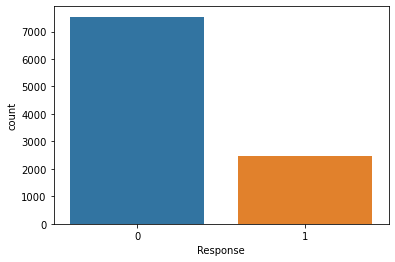

In [20]:
sns.countplot(x = df['Response'], data = df)

In [21]:
# Dropping unknown column

# Write the code here to drop unknown column and check dataframe shape
df=df.drop(['Unnamed: 0'], axis=1)
df.head()


,ID,City_Code,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Health Indicator,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,Reco_Policy_Premium,Response
0,27386,C3,64,1,1,36,36,0,X1,0,2.0,16,13320.0,0
1,33500,C3,2955,1,1,66,66,0,X6,1,1.0,19,16152.0,0
2,7998,C1,1542,0,1,24,24,0,X1,1,1.0,16,7310.0,0
3,33033,C26,772,0,1,75,75,0,X1,1,3.0,16,15792.0,0
4,30517,C2,1510,1,0,59,58,1,X1,0,4.0,17,23673.0,0


In [22]:
df.shape

(10000, 14)

In [23]:
# Getting all the Object Dtypes

print(df_categorical)
print(df_categorical.dtypes)
print(df_categorical.shape)

     City_Code Health Indicator
0           C3               X1
1           C3               X6
2           C1               X1
3          C26               X1
4           C2               X1
...        ...              ...
9995        C3               X5
9996        C5               X1
9997        C1               X1
9998        C1               X5
9999        C7               X2

[10000 rows x 2 columns]
City_Code           object
Health Indicator    object
dtype: object
(10000, 2)


In [24]:
# Encoding the categorical features



# column names are (annoyingly) lost after OneHotEncoding
# (i.e. the dataframe is converted to a numpy ndarray)

# Write the code here to use 'encoder' to convert all the categorical columns to numerical representations
# Take extra care to convert encoded numpy array to dataframe and call that data fram 'df_encoded'

from sklearn.preprocessing import OneHotEncoder
encoder=OneHotEncoder(sparse=False)
df_encoded=encoder.fit_transform(df_categorical)
df_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [25]:
df_encoded=pd.get_dummies(df_categorical,drop_first=True)

In [26]:
df_numerical=df.select_dtypes(include='number')
print(df_numerical.head())
print(df_numerical.shape)

      ID  Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  \
0  27386           64                  1                    1         36   
1  33500         2955                  1                    1         66   
2   7998         1542                  0                    1         24   
3  33033          772                  0                    1         75   
4  30517         1510                  1                    0         59   

   Lower_Age  Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  \
0         36          0                        0                  2.0   
1         66          0                        1                  1.0   
2         24          0                        1                  1.0   
3         75          0                        1                  3.0   
4         58          1                        0                  4.0   

   Reco_Policy_Cat  Reco_Policy_Premium  Response  
0               16              13320.0         0  


In [27]:
# Concatinating the original data frame and onehot encoded dataframe

df_main=pd.concat([df_numerical,df_encoded],axis=1)

df_main


,ID,Region_Code,Accomodation_Type,Reco_Insurance_Type,Upper_Age,Lower_Age,Is_Spouse,Holding_Policy_Duration,Holding_Policy_Type,Reco_Policy_Cat,...,City_Code_C8,City_Code_C9,Health Indicator_X2,Health Indicator_X3,Health Indicator_X4,Health Indicator_X5,Health Indicator_X6,Health Indicator_X7,Health Indicator_X8,Health Indicator_X9
0,27386,64,1,1,36,36,0,0,2.000000,16,...,0,0,0,0,0,0,0,0,0,0
1,33500,2955,1,1,66,66,0,1,1.000000,19,...,0,0,0,0,0,0,1,0,0,0
2,7998,1542,0,1,24,24,0,1,1.000000,16,...,0,0,0,0,0,0,0,0,0,0
3,33033,772,0,1,75,75,0,1,3.000000,16,...,0,0,0,0,0,0,0,0,0,0
4,30517,1510,1,0,59,58,1,0,4.000000,17,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,5204,13,1,0,47,40,1,0,2.431719,19,...,0,0,0,0,0,1,0,0,0,0
9996,35449,1477,0,1,34,34,0,1,1.000000,4,...,0,0,0,0,0,0,0,0,0,0
9997,47254,2357,1,1,64,64,0,1,2.000000,19,...,0,0,0,0,0,0,0,0,0,0
9998,42545,1443,0,1,53,53,0,0,3.000000,13,...,0,0,0,0,0,1,0,0,0,0


In [28]:
df_main.columns

Index(['ID', 'Region_Code', 'Accomodation_Type', 'Reco_Insurance_Type',
       'Upper_Age', 'Lower_Age', 'Is_Spouse', 'Holding_Policy_Duration',
       'Holding_Policy_Type', 'Reco_Policy_Cat', 'Reco_Policy_Premium',
       'Response', 'City_Code_C10', 'City_Code_C11', 'City_Code_C12',
       'City_Code_C13', 'City_Code_C14', 'City_Code_C15', 'City_Code_C16',
       'City_Code_C17', 'City_Code_C18', 'City_Code_C19', 'City_Code_C2',
       'City_Code_C20', 'City_Code_C21', 'City_Code_C22', 'City_Code_C23',
       'City_Code_C24', 'City_Code_C25', 'City_Code_C26', 'City_Code_C27',
       'City_Code_C28', 'City_Code_C29', 'City_Code_C3', 'City_Code_C30',
       'City_Code_C31', 'City_Code_C32', 'City_Code_C33', 'City_Code_C34',
       'City_Code_C35', 'City_Code_C36', 'City_Code_C4', 'City_Code_C5',
       'City_Code_C6', 'City_Code_C7', 'City_Code_C8', 'City_Code_C9',
       'Health Indicator_X2', 'Health Indicator_X3', 'Health Indicator_X4',
       'Health Indicator_X5', 'Health Indicat

In [29]:
# Drop all the unwanted columns.
df_final = df_main.drop(['ID'],axis=1)


# Because we have already encoded them and added to main dataframe



## Observe that 26.5% datapoints belong to one class rest all belongs to other class. Clearly dataset is having high imbalance.

**To Do:**
1. Read about Oversampling and Undersampling.
2. Perform undersampling.

In [30]:
# Find Number of samples having one as response

one_response = len(df_final[df_final['Response'] == 1])
print(one_response)



2459


In [31]:
# Get indices having zero as response

zero_response_indices = df_final[df_final['Response'] == 0].index
print(zero_response_indices)


Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,   10,
            ...
            9986, 9987, 9989, 9992, 9993, 9994, 9996, 9997, 9998, 9999],
           dtype='int64', length=7541)


In [32]:
# Random samples of zero indices

random_indices = np.random.choice(zero_response_indices, one_response, replace = False)
print(random_indices)


[3432 7009 5091 ... 5784 8545 7896]


In [33]:
# Find the indices of response having one 

response_indices = df_final[df_final['Response'] == 1].index
print(response_indices)


Int64Index([   9,   12,   21,   22,   34,   39,   40,   41,   42,   56,
            ...
            9955, 9959, 9968, 9975, 9980, 9983, 9988, 9990, 9991, 9995],
           dtype='int64', length=2459)


In [34]:
# Concat response_indices with random_indices

under_sample_indices = np.concatenate([response_indices, random_indices])
print(under_sample_indices)


[   9   12   21 ... 5784 8545 7896]


In [35]:
# Get Balance Dataframe

under_sample = df_final.loc[under_sample_indices]
print(under_sample.head())


    Region_Code  Accomodation_Type  Reco_Insurance_Type  Upper_Age  Lower_Age  \
9          3377                  0                    1         30         30   
12         5029                  1                    1         73         73   
21          573                  1                    1         35         35   
22          849                  1                    1         42         42   
34           71                  1                    1         36         36   

    Is_Spouse  Holding_Policy_Duration  Holding_Policy_Type  Reco_Policy_Cat  \
9           0                        0             2.431719               13   
12          0                        1             3.000000               15   
21          0                        1             3.000000               15   
22          0                        1             4.000000               22   
34          0                        1             1.000000               16   

    Reco_Policy_Premium  ...  Ci

<AxesSubplot:xlabel='Response', ylabel='count'>

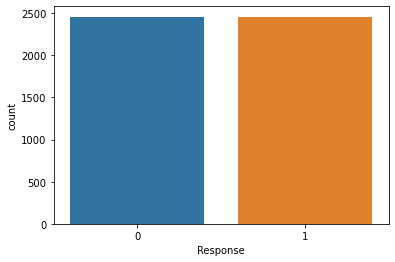

In [36]:
# Visualising Undersampled Data

sns.countplot(x = under_sample['Response'], data = under_sample)

In [37]:
under_sample.shape
under_sample.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 9 to 7896
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region_Code              4918 non-null   int64  
 1   Accomodation_Type        4918 non-null   int64  
 2   Reco_Insurance_Type      4918 non-null   int64  
 3   Upper_Age                4918 non-null   int64  
 4   Lower_Age                4918 non-null   int64  
 5   Is_Spouse                4918 non-null   int64  
 6   Holding_Policy_Duration  4918 non-null   int32  
 7   Holding_Policy_Type      4918 non-null   float64
 8   Reco_Policy_Cat          4918 non-null   int64  
 9   Reco_Policy_Premium      4918 non-null   float64
 10  Response                 4918 non-null   int64  
 11  City_Code_C10            4918 non-null   uint8  
 12  City_Code_C11            4918 non-null   uint8  
 13  City_Code_C12            4918 non-null   uint8  
 14  City_Code_C13           

In [38]:
df_under_sample = pd.get_dummies(under_sample)
df_under_sample.head()
df_under_sample.shape


(4918, 54)

In [39]:
# check all the columns of the encoded dataframe

df_under_sample.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 4918 entries, 9 to 7896
Data columns (total 54 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region_Code              4918 non-null   int64  
 1   Accomodation_Type        4918 non-null   int64  
 2   Reco_Insurance_Type      4918 non-null   int64  
 3   Upper_Age                4918 non-null   int64  
 4   Lower_Age                4918 non-null   int64  
 5   Is_Spouse                4918 non-null   int64  
 6   Holding_Policy_Duration  4918 non-null   int32  
 7   Holding_Policy_Type      4918 non-null   float64
 8   Reco_Policy_Cat          4918 non-null   int64  
 9   Reco_Policy_Premium      4918 non-null   float64
 10  Response                 4918 non-null   int64  
 11  City_Code_C10            4918 non-null   uint8  
 12  City_Code_C11            4918 non-null   uint8  
 13  City_Code_C12            4918 non-null   uint8  
 14  City_Code_C13           

In [40]:
# Drop all the unwanted columns.


# Because we have already encoded them and added to main dataframe

df_under_sample.drop(['City_Code_C10', 'City_Code_C11',
       'City_Code_C12', 'City_Code_C13', 'City_Code_C14', 'City_Code_C15',
       'City_Code_C16', 'City_Code_C17', 'City_Code_C18', 'City_Code_C19',
       'City_Code_C2', 'City_Code_C20', 'City_Code_C21', 'City_Code_C22',
       'City_Code_C23', 'City_Code_C24', 'City_Code_C25', 'City_Code_C26',
       'City_Code_C27', 'City_Code_C28', 'City_Code_C29', 'City_Code_C3',
       'City_Code_C30', 'City_Code_C31', 'City_Code_C32', 'City_Code_C33',
       'City_Code_C34', 'City_Code_C35', 'City_Code_C36', 'City_Code_C4',
       'City_Code_C5', 'City_Code_C6', 'City_Code_C7', 'City_Code_C8',
       'City_Code_C9'], axis = 1, inplace = True)
df_under_sample.shape

(4918, 19)

## Train Test Split

**To Do:**
1. Sandardise the data
2. Perform 80-20 split

In [41]:
X = df_under_sample.loc[:,df_under_sample.columns != 'Response']
y = df_under_sample.loc[:,df_under_sample.columns == 'Response']

# Standardize the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3442, 18) (1476, 18) (3442, 1) (1476, 1)


## Model Building - Logistic Regression

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance

## Model Building - SVM, KNN, DT, RF, Gradient Boosting, AdaBoosting etc

For all the algorithms mentioned above, perform below mentioned steps.

**To Do:**
1. Perform appropriate Hyperparameter Tuning
2. Train the Model using `Accuracy` as the evaluation metric
3. Predict
4. Evaluate
5. Use Accuracy, Confusion Matrix, Precision & Recall, F1-score and ROC AUC to understand model performance
6. Compare the perormance of all the models

## 1.Logistic Regression

In [42]:
# Logistic Regression Classifier
classifier_1 = LogisticRegression(random_state=0, solver="liblinear")
classifier_1.fit(X_train, y_train)


LogisticRegression(random_state=0, solver='liblinear')

In [43]:
# parameters
classifier_1.get_params(deep=True)

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'liblinear',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [44]:

#  Predict
y_pred_logi = classifier_1.predict(X_test)

# Generate predictions
predictions_logi_train =classifier_1.predict(X_train)
predictions_logi_test= classifier_1.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_1=classifier_1.score(X_train,y_train) 
print('Train_Score : ',train_Acc_1*100)

#ACCURACY = TEST DATA SCORE 
Acc_1=classifier_1.score(X_test, y_test)
print('Test_Score : ',Acc_1*100)




Train_Score :  54.09645554909937
Test_Score :  54.53929539295393


confusion_matrix is : 
[[363 347]
 [324 442]]
Accuracy score: 54.53929539295393
Precision score: 56.020278833967055
Recall score: 57.702349869451695
F1 score: 56.84887459807073
roc_auc_score_1 :  54.414555216415984
classification_report is : 
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       710
           1       0.56      0.58      0.57       766

    accuracy                           0.55      1476
   macro avg       0.54      0.54      0.54      1476
weighted avg       0.54      0.55      0.55      1476

[0.         0.51286449 1.        ] [0.         0.59657413 1.        ] [2 1 0]
[0.         0.48873239 1.        ] [0.        0.5770235 1.       ] [2 1 0]
Train AUC: 0.542
Test AUC: 0.544


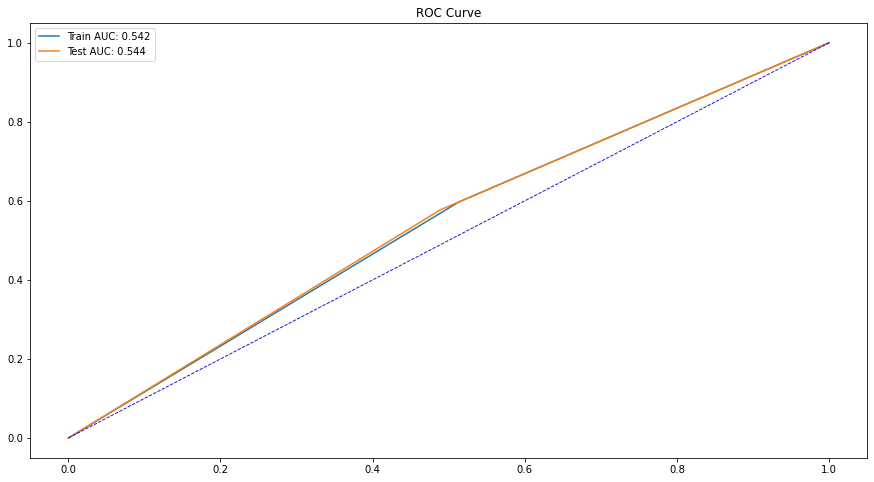

In [45]:
#  Confusion Matrix
print('confusion_matrix is : ')
cm_1= metrics.confusion_matrix(y_test, y_pred_logi) 
print(cm_1)

print('='*100)

accuracy_1 = metrics.accuracy_score(y_test, y_pred_logi) 
print("Accuracy score:",accuracy_1*100)

precision_1 = metrics.precision_score(y_test, y_pred_logi) 
print("Precision score:",precision_1*100)

recall_1 = metrics.recall_score(y_test, y_pred_logi) 
print("Recall score:",recall_1*100)

f1_1 = metrics.f1_score(y_test,y_pred_logi)
print("F1 score:",f1_1*100)

roc_auc_1 = roc_auc_score(y_test, predictions_logi_test)
print('roc_auc_score_1 : ', roc_auc_1*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_logi_test))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_logi_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_logi_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_logi = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_logi)

auc_test_logi = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_logi)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_logi)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_logi)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [46]:
tuned_parameters = [{'C': [10**-4, 10**-2, 10**0, 10**2, 10**4]}]
logi = GridSearchCV(LogisticRegression(penalty='l2'), tuned_parameters, scoring = 'roc_auc', cv=5)
logi.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid=[{'C': [0.0001, 0.01, 1, 100, 10000]}],
             scoring='roc_auc')

In [47]:
cv_results_svc=pd.DataFrame(logi.cv_results_)
cv_results_svc.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.140050,0.143999,0.012403,0.004455,0.0001,{'C': 0.0001},0.513350,0.475221,0.542967,0.569983,0.574562,0.535217,0.037133,5
1,0.137153,0.045533,0.014396,0.001958,0.01,{'C': 0.01},0.516738,0.494724,0.563931,0.573694,0.551944,0.540206,0.029804,1
2,0.112362,0.043449,0.015997,0.005063,1,{'C': 1},0.534437,0.476578,0.565317,0.573702,0.548512,0.539709,0.034357,2
3,0.083181,0.028990,0.013596,0.003198,100,{'C': 100},0.534564,0.476570,0.565292,0.573702,0.548072,0.539640,0.034331,4
4,0.110547,0.064262,0.013041,0.002617,10000,{'C': 10000},0.534555,0.476570,0.565292,0.573702,0.548098,0.539643,0.034332,3


In [48]:
#The accuracy of the model with the best parameters
logi_score=(logi.score(X_test, y_test)*100)
print("Accuracy is :" ,logi_score)

print('='*100)

logi_score1=logi.best_score_
print("best_score : ",logi_score1*100)
print("best_params : ",logi.best_params_)
print("best_estimator : ",logi.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_grid = logi.predict(X_test)
print(classification_report(y_test, y_grid))

print('='*100)

hyper_accuracy_1 = metrics.accuracy_score(y_test, y_grid) 
print("Accuracy score:",hyper_accuracy_1*100)

hyper_precision_1 = metrics.precision_score(y_test, y_grid) 
print("Precision score:",hyper_precision_1*100)

hyper_recall_1 = metrics.recall_score(y_test, y_grid) 
print("Recall score:",hyper_recall_1*100)

hyper_f1_1 = metrics.f1_score(y_test, y_grid)
print("F1 score:",hyper_f1_1*100)

# roc auc score for test data
hyper_roc_auc_1 = roc_auc_score(y_test, y_grid)
print('roc_auc_score_3 : ', hyper_roc_auc_1)

Accuracy is : 55.597396388776524
best_score :  54.02061146592073
best_params :  {'C': 0.01}
best_estimator :  LogisticRegression(C=0.01)
classification_report is : 
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       710
           1       0.55      0.60      0.57       766

    accuracy                           0.53      1476
   macro avg       0.53      0.53      0.53      1476
weighted avg       0.53      0.53      0.53      1476

Accuracy score: 53.387533875338754
Precision score: 54.63182897862233
Recall score: 60.052219321148826
F1 score: 57.2139303482587
roc_auc_score_3 :  0.531247012098702


## 2.Decision Tree

In [49]:
#  Fit the classifier

classifier_2 = DecisionTreeClassifier(criterion = "entropy", random_state=0)
classifier_2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
# parameters
classifier_2.get_params(deep=True)

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 0,
 'splitter': 'best'}

In [51]:

# Making predictions on Test data
y_pred_dtr= classifier_2.predict(X_test)

# Generate predictions
predictions_dtr_train =classifier_2.predict(X_train)
predictions_dtr_test= classifier_2.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_2=classifier_2.score(X_train,y_train)          
print('Train_Score : ',train_Acc_2*100)

#ACCURACY = TEST DATA SCORE 
Acc_2=classifier_2.score(X_test, y_test)  
print('Test_Score : ',Acc_2*100)


Train_Score :  100.0
Test_Score :  52.03252032520326


confusion_matrix is : 
[[388 322]
 [386 380]]
Accuracy score: 52.03252032520326
Precision score: 54.131054131054135
Recall score: 49.60835509138381
F1 score: 51.77111716621254
roc_auc_score_2 :  52.12812120766374
classification_report is : 
              precision    recall  f1-score   support

          NO       0.50      0.55      0.52       710
         YES       0.54      0.50      0.52       766

    accuracy                           0.52      1476
   macro avg       0.52      0.52      0.52      1476
weighted avg       0.52      0.52      0.52      1476

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.45352113 1.        ] [0.         0.49608355 1.        ] [2 1 0]
Train AUC: 1.000
Test AUC: 0.521


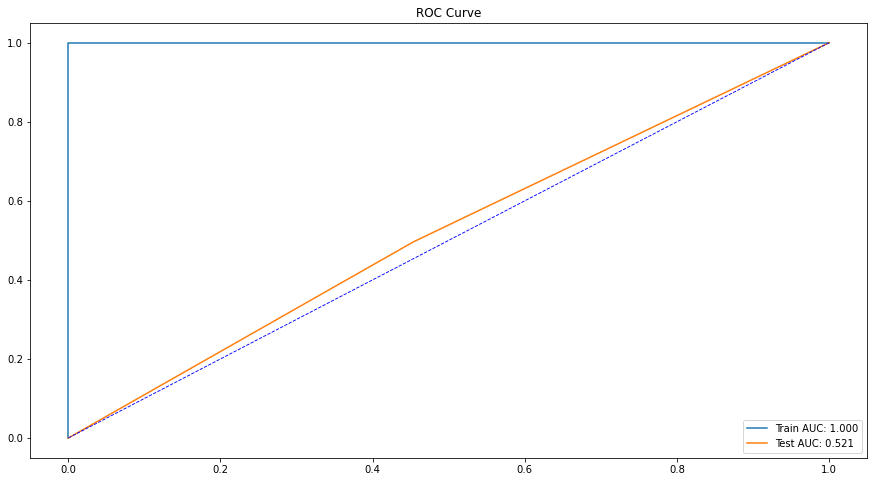

In [52]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_2 = metrics.confusion_matrix(y_test, y_pred_dtr) 
print(cm_2)

print('='*100)

accuracy_2 = metrics.accuracy_score(y_test, y_pred_dtr) 
print("Accuracy score:",accuracy_2*100)

precision_2 = metrics.precision_score(y_test, y_pred_dtr) 
print("Precision score:",precision_2*100)

recall_2 = metrics.recall_score(y_test, y_pred_dtr) 
print("Recall score:",recall_2*100)

f1_2 = metrics.f1_score(y_test,y_pred_dtr) 
print("F1 score:",f1_2*100)

roc_auc_2 = roc_auc_score(y_test, predictions_dtr_test)
print('roc_auc_score_2 : ', roc_auc_2*100)

print('='*100)

 # Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_dtr_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_dtr_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_dtr_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_dtr = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_dtr)

auc_test_dtr = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_dtr)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_dtr)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_dtr)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [53]:

dtr = DecisionTreeClassifier()
tuned_parameters=[{'max_depth':[2,3,5,10],'min_samples_leaf':[5,10,20,50]}]
DTR=GridSearchCV( DecisionTreeClassifier(),tuned_parameters,scoring='roc_auc',cv=5,n_jobs=-1)
DTR.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid=[{'max_depth': [2, 3, 5, 10],
                          'min_samples_leaf': [5, 10, 20, 50]}],
             scoring='roc_auc')

In [54]:
cv_results_dtr=pd.DataFrame(DTR.cv_results_)
cv_results_dtr.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.025592,0.001959,0.026394,0.011479,2,5,"{'max_depth': 2, 'min_samples_leaf': 5}",0.547674,0.527737,0.560549,0.569434,0.57976,0.557031,0.018047,12
1,0.030394,0.004080,0.018395,0.001958,2,10,"{'max_depth': 2, 'min_samples_leaf': 10}",0.547670,0.527737,0.560549,0.569413,0.57976,0.557026,0.018045,13
2,0.031190,0.006398,0.019996,0.003579,2,20,"{'max_depth': 2, 'min_samples_leaf': 20}",0.547649,0.527737,0.560549,0.569404,0.57976,0.557020,0.018046,14
3,0.028792,0.010550,0.019197,0.004663,2,50,"{'max_depth': 2, 'min_samples_leaf': 50}",0.547674,0.527737,0.560549,0.569362,0.57976,0.557016,0.018037,15
4,0.036789,0.009925,0.017596,0.004077,3,5,"{'max_depth': 3, 'min_samples_leaf': 5}",0.558032,0.526275,0.577760,0.562249,0.58129,0.561121,0.019538,9


In [55]:
#The accuracy of the model with the best parameters
dtr_score=DTR.score(X_test, y_test)
print("Best_Score is :" ,DTR.score(X_test, y_test)*100)

print('='*100)

dtr_score1=DTR.best_score_
print("best_score : ",dtr_score1*100)
print("best_params : ",DTR.best_params_)
print("best_estimator : ",DTR.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = DTR.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_2 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_2*100)

hyper_precision_2 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_2*100)

hyper_recall_2 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_2*100)

hyper_f1_2 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_2*100)

# roc auc score for test data
hyper_roc_auc_2 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_3 : ', hyper_roc_auc_2)


Best_Score is : 57.74362887507816
best_score :  57.554421446068694
best_params :  {'max_depth': 5, 'min_samples_leaf': 50}
best_estimator :  DecisionTreeClassifier(max_depth=5, min_samples_leaf=50)
classification_report is : 
              precision    recall  f1-score   support

           0       0.52      0.64      0.57       710
           1       0.58      0.45      0.51       766

    accuracy                           0.54      1476
   macro avg       0.55      0.55      0.54      1476
weighted avg       0.55      0.54      0.54      1476

Accuracy score: 54.40379403794038
Precision score: 57.711442786069654
Recall score: 45.43080939947781
F1 score: 50.8400292184076
roc_auc_score_3 :  0.5475765822086567


## 3.Random Forest Algorithm

In [56]:
#  Fit Classifier

classifier_3 = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
classifier_3.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', random_state=0)

In [57]:
# parameters
classifier_3.get_params(deep=True)

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [58]:

#  Predict
y_pred_rfr = classifier_3.predict(X_test)

# Generate predictions
predictions_rfr_train =classifier_3.predict(X_train)
predictions_rfr_test= classifier_3.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_3=classifier_3.score(X_train,y_train)          
print('Train_Score : ',train_Acc_3*100)

#ACCURACY = TEST DATA SCORE 
Acc_3=classifier_3.score(X_test, y_test) 
print('Train_Score : ',Acc_3*100)


Train_Score :  100.0
Train_Score :  54.74254742547425


confusion_matrix is : 
[[405 305]
 [363 403]]
Accuracy score: 54.74254742547425
Precision score: 56.92090395480226
Recall score: 52.61096605744125
F1 score: 54.681139755766615
roc_auc_score_3 :  54.82660978928401
classification_report is : 
              precision    recall  f1-score   support

          NO       0.53      0.57      0.55       710
         YES       0.57      0.53      0.55       766

    accuracy                           0.55      1476
   macro avg       0.55      0.55      0.55      1476
weighted avg       0.55      0.55      0.55      1476

[0. 0. 1.] [0. 1. 1.] [2 1 0]
[0.         0.42957746 1.        ] [0.         0.52610966 1.        ] [2 1 0]
Train AUC: 1.000
Test AUC: 0.548


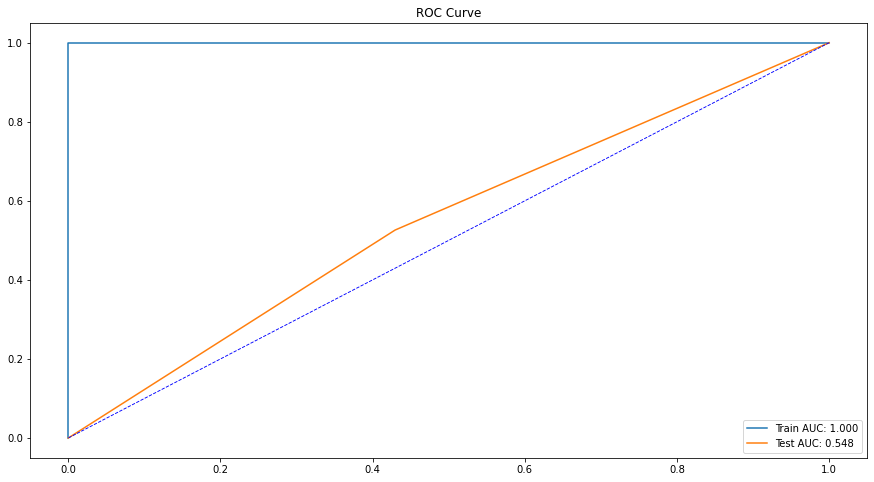

In [59]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_3 = metrics.confusion_matrix(y_test, y_pred_rfr) 
print(cm_3)

print('='*100)

accuracy_3 = metrics.accuracy_score(y_test,y_pred_rfr) 
print("Accuracy score:",accuracy_3*100)

precision_3 = metrics.precision_score(y_test,y_pred_rfr) 
print("Precision score:",precision_3*100)

recall_3 = metrics.recall_score(y_test,y_pred_rfr) 
print("Recall score:",recall_3*100)

f1_3 = metrics.f1_score(y_test,y_pred_rfr) 
print("F1 score:",f1_3*100)

roc_auc_3 = roc_auc_score(y_test, predictions_rfr_test)
print('roc_auc_score_3 : ', roc_auc_3*100)

print('='*100)

 # Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_rfr_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate ROC
FPR, TPR, LRM = roc_curve(y_train, predictions_rfr_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_rfr_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_rfr = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_rfr)

auc_test_rfr = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_rfr)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_rfr)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_rfr)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [60]:

rfr = RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0)
tuned_parameters=[{'n_estimators':[20,50,100],'max_features':[1,2,3]}]
RFR=GridSearchCV(RandomForestClassifier(n_estimators=100, criterion="entropy", random_state=0),tuned_parameters,scoring='roc_auc',cv=5)
RFR.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(criterion='entropy',
                                              random_state=0),
             param_grid=[{'max_features': [1, 2, 3],
                          'n_estimators': [20, 50, 100]}],
             scoring='roc_auc')

In [61]:
cv_results_rfr=pd.DataFrame(RFR.cv_results_)
cv_results_rfr.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.193897,0.021599,0.020803,0.002986,1,20,"{'max_features': 1, 'n_estimators': 20}",0.575512,0.506983,0.509810,0.541209,0.512645,0.529232,0.026202,9
1,0.444198,0.006114,0.038395,0.005422,1,50,"{'max_features': 1, 'n_estimators': 50}",0.579600,0.524994,0.520795,0.522210,0.519153,0.533350,0.023204,8
2,0.888789,0.008062,0.062602,0.003060,1,100,"{'max_features': 1, 'n_estimators': 100}",0.577303,0.527472,0.528787,0.517079,0.524567,0.535042,0.021517,7
3,0.230635,0.040672,0.023937,0.008026,2,20,"{'max_features': 2, 'n_estimators': 20}",0.558820,0.532735,0.560330,0.544311,0.525809,0.544401,0.013736,6
4,0.489655,0.008612,0.037844,0.001889,2,50,"{'max_features': 2, 'n_estimators': 50}",0.556802,0.539515,0.547692,0.544784,0.533480,0.544455,0.007847,5


In [62]:
#The accuracy of the model with the best parameters
rfr_score=RFR.score(X_test, y_test)
print("Best_Score is :" ,rfr_score*100)

print('='*100)

rfr_score1=RFR.best_score_
print("best_score : ",rfr_score1*100)
print("best_params : ",RFR.best_params_)
print("best_estimator : ",RFR.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = RFR.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_3 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_3*100)

hyper_precision_3 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_3*100)

hyper_recall_3 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_3*100)

hyper_f1_3 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_3*100)

# roc auc score for test data
hyper_roc_auc_3 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_3 : ', hyper_roc_auc_3)


Best_Score is : 56.28810723347921
best_score :  54.701998168601776
best_params :  {'max_features': 2, 'n_estimators': 100}
best_estimator :  RandomForestClassifier(criterion='entropy', max_features=2, random_state=0)
classification_report is : 
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       710
           1       0.55      0.50      0.52       766

    accuracy                           0.53      1476
   macro avg       0.53      0.53      0.53      1476
weighted avg       0.53      0.53      0.53      1476

Accuracy score: 53.116531165311656
Precision score: 55.362318840579704
Recall score: 49.869451697127936
F1 score: 52.47252747252746
roc_auc_score_3 :  0.5324458500349355


## 4.KNN

In [63]:
# fitting the model

classifier_4 = KNeighborsClassifier(n_neighbors=3)
classifier_4.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [64]:
# parameters
classifier_4.get_params(deep=True)

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'uniform'}

In [65]:

#  Predict
y_pred_knn = classifier_4.predict(X_test)

# Generate predictions
predictions_knn_train =classifier_4.predict(X_train)
predictions_knn_test= classifier_4.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_4=classifier_4.score(X_train,y_train)          
print('Train_Score : ',train_Acc_4*100)

#ACCURACY = TEST DATA SCORE 
Acc_4=classifier_4.score(X_test, y_test) 
print('Test_Score : ',Acc_4*100)


Train_Score :  74.25915165601394
Test_Score :  48.84823848238483


confusion_matrix is : 
[[345 365]
 [390 376]]
Accuracy score: 48.84823848238483
Precision score: 50.742240215924426
Recall score: 49.08616187989556
F1 score: 49.90046449900465
roc_auc_score_3 :  48.838855587835106
classification_report is : 
              precision    recall  f1-score   support

          NO       0.47      0.49      0.48       710
         YES       0.51      0.49      0.50       766

    accuracy                           0.49      1476
   macro avg       0.49      0.49      0.49      1476
weighted avg       0.49      0.49      0.49      1476

[0.         0.25100057 1.        ] [0.         0.73597165 1.        ] [2 1 0]
[0.         0.51408451 1.        ] [0.         0.49086162 1.        ] [2 1 0]
Train AUC: 0.742
Test AUC: 0.488


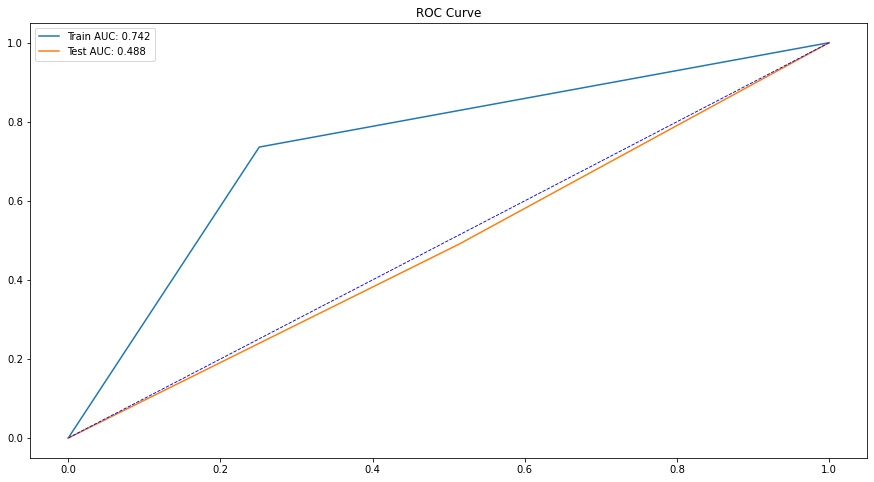

In [66]:
# Evaluate the model performance
print('confusion_matrix is : ')
cm_4 = metrics.confusion_matrix(y_test, y_pred_knn) 
print(cm_4)

print('='*100)

accuracy_4 = metrics.accuracy_score(y_test,y_pred_knn) 
print("Accuracy score:",accuracy_4*100)

precision_4 = metrics.precision_score(y_test,y_pred_knn) 
print("Precision score:",precision_4*100)

recall_4 = metrics.recall_score(y_test,y_pred_knn) 
print("Recall score:",recall_4*100)

f1_4 = metrics.f1_score(y_test,y_pred_knn) 
print("F1 score:",f1_4*100)

roc_auc_4 = roc_auc_score(y_test, predictions_knn_test)
print('roc_auc_score_3 : ', roc_auc_4*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_knn_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_knn_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_knn_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_knn = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_knn)

auc_test_knn = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_knn)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_knn)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_knn)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [67]:

knn = KNeighborsClassifier(n_neighbors=3)
tuned_parameters=[{'n_neighbors':[3,20,2],'metric':['canberra','euclidean','minkowski']}]
KNN=GridSearchCV(KNeighborsClassifier(n_neighbors=3),tuned_parameters,scoring='roc_auc',cv=5,n_jobs=-1)
KNN.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=KNeighborsClassifier(n_neighbors=3), n_jobs=-1,
             param_grid=[{'metric': ['canberra', 'euclidean', 'minkowski'],
                          'n_neighbors': [3, 20, 2]}],
             scoring='roc_auc')

In [68]:
cv_results_knn=pd.DataFrame(KNN.cv_results_)
cv_results_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.198248,0.089813,0.619739,0.118036,canberra,3,"{'metric': 'canberra', 'n_neighbors': 3}",0.532170,0.510535,0.508728,0.513052,0.505866,0.514070,0.009349,2
1,0.027992,0.010119,0.427891,0.013142,canberra,20,"{'metric': 'canberra', 'n_neighbors': 20}",0.517863,0.513102,0.517156,0.526551,0.514496,0.517833,0.004690,1
2,0.025594,0.003199,0.373506,0.014438,canberra,2,"{'metric': 'canberra', 'n_neighbors': 2}",0.518078,0.501315,0.519484,0.497709,0.503165,0.507950,0.009027,3
3,0.026393,0.007415,0.183952,0.011589,euclidean,3,"{'metric': 'euclidean', 'n_neighbors': 3}",0.503957,0.485360,0.499806,0.505304,0.471427,0.493171,0.012972,6
4,0.035984,0.006198,0.194360,0.013756,euclidean,20,"{'metric': 'euclidean', 'n_neighbors': 20}",0.492259,0.497008,0.506107,0.510634,0.503618,0.501925,0.006539,4


In [69]:
#The accuracy of the model with the best parameters
knn_score=KNN.score(X_test, y_test)
print("Best_Score is :" ,knn_score*100)

print('='*100)

knn_score1=KNN.best_score_
print("best_score : ",knn_score1*100)
print("best_params : ",KNN.best_params_)
print("best_estimator : ",KNN.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = KNN.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_4 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_4*100)

hyper_precision_4 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_4*100)

hyper_recall_4 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_4*100)

hyper_f1_4 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_4*100)

# roc auc score for test data
hyper_roc_auc_4 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_3 : ', hyper_roc_auc_4)


Best_Score is : 50.960449380355236
best_score :  51.78334789336583
best_params :  {'metric': 'canberra', 'n_neighbors': 20}
best_estimator :  KNeighborsClassifier(metric='canberra', n_neighbors=20)
classification_report is : 
              precision    recall  f1-score   support

           0       0.49      0.59      0.54       710
           1       0.53      0.43      0.48       766

    accuracy                           0.51      1476
   macro avg       0.51      0.51      0.51      1476
weighted avg       0.51      0.51      0.51      1476

Accuracy score: 51.016260162601625
Precision score: 53.45104333868379
Recall score: 43.472584856396864
F1 score: 47.94816414686825
roc_auc_score_3 :  0.5131375721693083


## 5.SVM

In [70]:
# fitting the model

classifier_5 = svm.SVC()
classifier_5.fit(X_train, y_train)


SVC()

In [71]:
# parameters
classifier_5.get_params(deep=True)

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [72]:
#  Predict
y_pred_svc = classifier_5.predict(X_test)

# Generate predictions
predictions_svc_train =classifier_5.predict(X_train)
predictions_svc_test= classifier_5.predict(X_test)
                                           
#ACCURACY = TRAIN DATA SCORE 
train_Acc_5=classifier_5.score(X_train,y_train)          
print('Train_Score : ',train_Acc_5*100)

#ACCURACY = TEST DATA SCORE 
Acc_5=classifier_5.score(X_test, y_test) 
print('Test_Score : ',Acc_5*100)


Train_Score :  51.88843695525856
Test_Score :  51.76151761517615


confusion_matrix is : 
[[413 297]
 [415 351]]
Accuracy score: 51.76151761517615
Precision score: 54.166666666666664
Recall score: 45.822454308093995
F1 score: 49.64639321074964
roc_auc_score_5 :  51.995734196300525
classification_report is : 
              precision    recall  f1-score   support

          NO       0.50      0.58      0.54       710
         YES       0.54      0.46      0.50       766

    accuracy                           0.52      1476
   macro avg       0.52      0.52      0.52      1476
weighted avg       0.52      0.52      0.52      1476

[0.         0.41623785 1.        ] [0.        0.4518606 1.       ] [2 1 0]
[0.         0.41830986 1.        ] [0.         0.45822454 1.        ] [2 1 0]
Train AUC: 0.518
Test AUC: 0.520


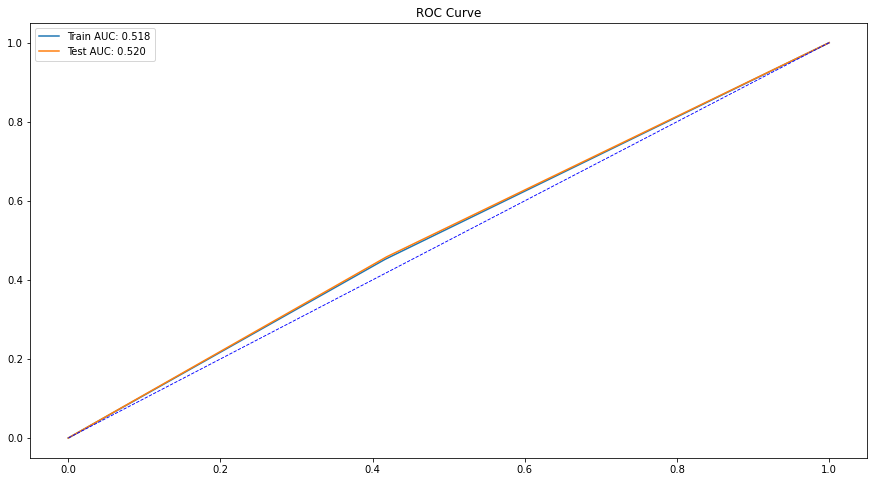

In [73]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_5 = metrics.confusion_matrix(y_test, y_pred_svc) 
print(cm_5)

print('='*100)

accuracy_5 = metrics.accuracy_score(y_test,y_pred_svc) 
print("Accuracy score:",accuracy_5*100)

precision_5 = metrics.precision_score(y_test,y_pred_svc) 
print("Precision score:",precision_5*100)

recall_5 = metrics.recall_score(y_test,y_pred_svc) 
print("Recall score:",recall_5*100)

f1_5 = metrics.f1_score(y_test,y_pred_svc) 
print("F1 score:",f1_5*100)

roc_auc_5 = roc_auc_score(y_test, predictions_svc_test)
print('roc_auc_score_5 : ', roc_auc_5*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test,predictions_svc_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_svc_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_svc_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_svc = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_svc)

auc_test_svc = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_svc)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_svc)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_svc)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();


## Hyper-parameters:

In [74]:

svc = svm.SVC()
tuned_parameters=[{'gamma':[1e-2,1e-3,1e-4],'C':[1,10,100,1000]}]
svc=GridSearchCV(svm.SVC(),tuned_parameters,scoring='roc_auc',cv=5)
svc.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             scoring='roc_auc')

In [75]:
cv_results_svc=pd.DataFrame(svc.cv_results_)
cv_results_svc.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.992507,0.229959,0.824940,0.045457,1,0.01,"{'C': 1, 'gamma': 0.01}",0.481294,0.492368,0.483149,0.487992,0.463101,0.481581,0.010015,7
1,1.899903,0.017303,0.820010,0.079551,1,0.001,"{'C': 1, 'gamma': 0.001}",0.499726,0.491041,0.473314,0.487202,0.466398,0.483536,0.012084,5
2,1.760442,0.077261,0.736359,0.058061,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.507754,0.477771,0.489374,0.507160,0.475733,0.491558,0.013791,1
3,1.870039,0.070116,0.779967,0.045896,10,0.01,"{'C': 10, 'gamma': 0.01}",0.480232,0.492385,0.482113,0.489011,0.462062,0.481161,0.010528,9
4,1.795748,0.063748,0.786577,0.020772,10,0.001,"{'C': 10, 'gamma': 0.001}",0.499663,0.493919,0.472396,0.487202,0.466237,0.483884,0.012681,4


In [76]:
#The accuracy of the model with the best parameters
svc_score=svc.score(X_test, y_test)
print("Best_Score is :" ,svc_score*100)

print('='*100)

svc_score1=svc.best_score_
print("best_score : ",svc_score1*100)
print("best_params : ",svc.best_params_)
print("best_estimator : ",svc.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = svc.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_5 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_5*100)

hyper_precision_5 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_5*100)

hyper_recall_5 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_5*100)

hyper_f1_5 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_5*100)

# roc auc score for test data
hyper_roc_auc_5 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_5 : ', hyper_roc_auc_5)


Best_Score is : 48.27271724340822
best_score :  49.15584671238382
best_params :  {'C': 1, 'gamma': 0.0001}
best_estimator :  SVC(C=1, gamma=0.0001)
classification_report is : 
              precision    recall  f1-score   support

           0       0.47      0.53      0.50       710
           1       0.51      0.46      0.48       766

    accuracy                           0.49      1476
   macro avg       0.49      0.49      0.49      1476
weighted avg       0.49      0.49      0.49      1476

Accuracy score: 48.9159891598916
Precision score: 50.87463556851311
Recall score: 45.561357702349866
F1 score: 48.07162534435262
roc_auc_score_5 :  0.49048284484977756


## 6.Gradient Boosting

In [77]:
# fitting the model

classifier_6 = GradientBoostingClassifier()
classifier_6.fit(X_train, y_train)


GradientBoostingClassifier()

In [78]:
# parameters
classifier_6.get_params(deep=True)

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'deviance',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': None,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [79]:
# Predict
y_pred_grad = classifier_6.predict(X_test)

# Generate predictions
predictions_grad_train =classifier_6.predict(X_train)
predictions_grad_test= classifier_6.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_6=classifier_6.score(X_train,y_train)          
print('Train_Score : ',train_Acc_6*100)

#ACCURACY = TEST DATA SCORE 
Acc_6=classifier_6.score(X_test, y_test) 
print('Test_Score : ',train_Acc_6*100)



Train_Score :  68.50668216153399
Test_Score :  68.50668216153399


confusion_matrix is : 
[[375 335]
 [282 484]]
Accuracy score: 58.19783197831978
Precision score: 59.0964590964591
Recall score: 63.18537859007834
F1 score: 61.07255520504733
roc_auc_score_6 :  58.00113999926452
classification_report is : 
              precision    recall  f1-score   support

          NO       0.57      0.53      0.55       710
         YES       0.59      0.63      0.61       766

    accuracy                           0.58      1476
   macro avg       0.58      0.58      0.58      1476
weighted avg       0.58      0.58      0.58      1476

[0.         0.35906232 1.        ] [0.         0.73065564 1.        ] [2 1 0]
[0.         0.47183099 1.        ] [0.         0.63185379 1.        ] [2 1 0]
Train AUC: 0.686
Test AUC: 0.580


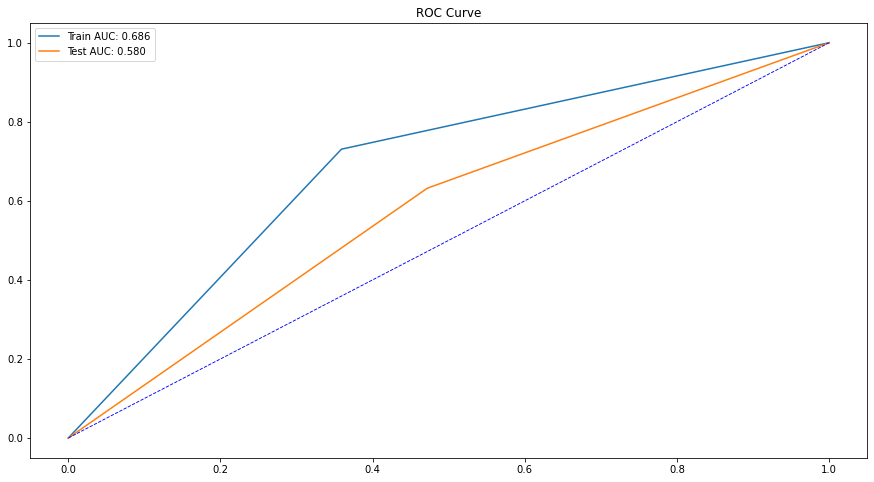

In [80]:
#  Evaluate the model performance
print('confusion_matrix is : ')
cm_6 = metrics.confusion_matrix(y_test, y_pred_grad) 
print(cm_6)

print('='*100)

accuracy_6 = metrics.accuracy_score(y_test,y_pred_grad) 
print("Accuracy score:",accuracy_6*100)

precision_6 = metrics.precision_score(y_test,y_pred_grad) 
print("Precision score:",precision_6*100)

recall_6 = metrics.recall_score(y_test,y_pred_grad) 
print("Recall score:",recall_6*100)

f1_6 = metrics.f1_score(y_test,y_pred_grad) 
print("F1 score:",f1_6*100)

roc_auc_6 = roc_auc_score(y_test, predictions_grad_test)
print('roc_auc_score_6 : ', roc_auc_6*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_grad_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_grad_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_grad_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_grad = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_grad)

auc_test_grad = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_grad)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_grad)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_grad)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [81]:

grad_boost = GradientBoostingClassifier()
tuned_parameters=[{'n_estimators': [100, 200,500],'learning_rate': [0.2,0.5,1.0],'max_depth':[1,2,3]}]
GRAD=GridSearchCV(GradientBoostingClassifier(),tuned_parameters,scoring='roc_auc',cv=5)
GRAD.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid=[{'learning_rate': [0.2, 0.5, 1.0],
                          'max_depth': [1, 2, 3],
                          'n_estimators': [100, 200, 500]}],
             scoring='roc_auc')

In [82]:
cv_results_grad=pd.DataFrame(GRAD.cv_results_)
cv_results_grad.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.434378,0.065665,0.010398,0.001958,0.2,1,100,"{'learning_rate': 0.2, 'max_depth': 1, 'n_esti...",0.564083,0.555512,0.599019,0.586834,0.587101,0.578510,0.016129,5
1,0.790322,0.084645,0.014397,0.003199,0.2,1,200,"{'learning_rate': 0.2, 'max_depth': 1, 'n_esti...",0.570257,0.555331,0.596555,0.592122,0.585123,0.579878,0.015170,2
2,1.865563,0.055288,0.014393,0.001964,0.2,1,500,"{'learning_rate': 0.2, 'max_depth': 1, 'n_esti...",0.567990,0.548951,0.600241,0.599835,0.580073,0.579418,0.019543,4
3,0.586868,0.007324,0.012798,0.001590,0.2,2,100,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.595735,0.548769,0.610731,0.581074,0.576375,0.582537,0.020734,1
4,1.250532,0.059879,0.013596,0.001953,0.2,2,200,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.589102,0.546890,0.598609,0.573669,0.566989,0.575052,0.017958,9


In [83]:
#The accuracy of the model with the best parameters
grad_score=GRAD.score(X_test, y_test)
print("Best_Score is :" ,grad_score*100)

print('='*100)

grad_score1=GRAD.best_score_
print("best_score : ",grad_score1*100)
print("best_params : ",GRAD.best_params_)
print("best_estimator : ",GRAD.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = GRAD.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_6 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_6*100)

hyper_precision_6 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_6*100)

hyper_recall_6 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_6*100)

hyper_f1_6 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_6*100)

hyper_roc_auc_6 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_6 : ', hyper_roc_auc_6)

Best_Score is : 60.067112859927185
best_score :  58.25369115453574
best_params :  {'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 100}
best_estimator :  GradientBoostingClassifier(learning_rate=0.2, max_depth=2)
classification_report is : 
              precision    recall  f1-score   support

           0       0.55      0.54      0.54       710
           1       0.58      0.59      0.58       766

    accuracy                           0.56      1476
   macro avg       0.56      0.56      0.56      1476
weighted avg       0.56      0.56      0.56      1476

Accuracy score: 56.43631436314364
Precision score: 57.874519846350836
Recall score: 59.00783289817232
F1 score: 58.43568196509372
roc_auc_score_6 :  0.5633490236457912


## 7.AdaBoosting

In [84]:
# fitting the model

classifier_7 = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
classifier_7.fit(X_train, y_train)



AdaBoostClassifier(learning_rate=0.2, n_estimators=20, random_state=123)

In [85]:
# parameters
classifier_7.get_params(deep=True)

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.2,
 'n_estimators': 20,
 'random_state': 123}

In [86]:
#  Predict
y_pred_ada = classifier_7.predict(X_test)

# Generate predictions
predictions_ada_train =classifier_7.predict(X_train)
predictions_ada_test= classifier_7.predict(X_test)

#ACCURACY = TRAIN DATA SCORE 
train_Acc_7=classifier_7.score(X_train,y_train)          
print('Train_Score : ',train_Acc_7*100)

#ACCURACY = TEST DATA SCORE 
Acc_7=classifier_7.score(X_test, y_test) 
print('Train_Score : ',Acc_7*100)


Train_Score :  56.10110400929692
Train_Score :  56.639566395663955


confusion_matrix is : 
[[188 522]
 [118 648]]
Accuracy score: 56.639566395663955
Precision score: 55.38461538461539
Recall score: 84.59530026109661
F1 score: 66.94214876033058
roc_auc_score_7 :  55.53708675026662
classification_report is : 
              precision    recall  f1-score   support

          NO       0.61      0.26      0.37       710
         YES       0.55      0.85      0.67       766

    accuracy                           0.57      1476
   macro avg       0.58      0.56      0.52      1476
weighted avg       0.58      0.57      0.53      1476

[0.         0.70783305 1.        ] [0.         0.83874778 1.        ] [2 1 0]
[0.         0.73521127 1.        ] [0.       0.845953 1.      ] [2 1 0]
Train AUC: 0.565
Test AUC: 0.555


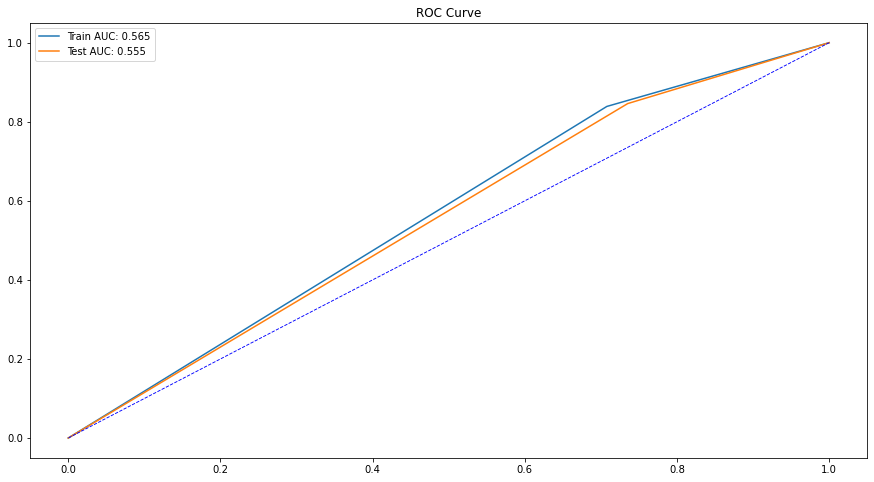

In [87]:
# Evaluate the model performance
print('confusion_matrix is : ')
cm_7 = metrics.confusion_matrix(y_test, y_pred_ada) 
print(cm_7)

print('='*100)

accuracy_7 = metrics.accuracy_score(y_test,y_pred_ada) 
print("Accuracy score:",accuracy_7*100)

precision_7 = metrics.precision_score(y_test,y_pred_ada) 
print("Precision score:",precision_7*100)

recall_7 = metrics.recall_score(y_test,y_pred_ada) 
print("Recall score:",recall_7*100)

f1_7 = metrics.f1_score(y_test,y_pred_ada) 
print("F1 score:",f1_7*100)

roc_auc_7 = roc_auc_score(y_test, y_pred_ada)
print('roc_auc_score_7 : ', roc_auc_7*100)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
print(classification_report(y_test, predictions_ada_test, target_names = ['NO', 'YES']))

print('='*100)

# calculate 
FPR, TPR, LRM = roc_curve(y_train, predictions_ada_train)
FPR1, TPR1, LRM = roc_curve(y_test,predictions_ada_test)
print(FPR, TPR, LRM)
print(FPR1, TPR1, LRM)

print('='*100)

# calculate AUC
auc_train_ada = auc(FPR, TPR)
print('Train AUC: %0.3f' % auc_train_ada)

auc_test_ada = auc(FPR1, TPR1)
print('Test AUC: %0.3f' % auc_test_ada)

print('='*100)

# plot the ROC curve
plt.figure(figsize=(15,8))
plt.plot(FPR, TPR, label = 'Train AUC: %0.3f'%auc_train_ada)
plt.plot(FPR1, TPR1, label = 'Test AUC: %0.3f'%auc_test_ada)

plt.plot([1,0],[1,0], ls = '--', color = 'blue', lw = 0.90)

plt.title('ROC Curve')
plt.legend()
plt.show();

## Hyper-parameters:

In [88]:

ada_boost = AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123)
tuned_parameters=[{'n_estimators': [100, 200,500],'learning_rate': [0.2,0.5,1.0]}]
ADA=GridSearchCV(AdaBoostClassifier(n_estimators = 20, learning_rate = 0.2, random_state = 123),tuned_parameters,scoring='roc_auc',cv=5)
ADA.fit(X_train,y_train)


GridSearchCV(cv=5,
             estimator=AdaBoostClassifier(learning_rate=0.2, n_estimators=20,
                                          random_state=123),
             param_grid=[{'learning_rate': [0.2, 0.5, 1.0],
                          'n_estimators': [100, 200, 500]}],
             scoring='roc_auc')

In [89]:
cv_results_ada=pd.DataFrame(ADA.cv_results_)
cv_results_ada.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.872052,0.057986,0.089578,0.017434,0.2,100,"{'learning_rate': 0.2, 'n_estimators': 100}",0.565963,0.557012,0.597730,0.590148,0.583057,0.578782,0.015131,4
1,2.888877,1.119261,0.270458,0.088032,0.2,200,"{'learning_rate': 0.2, 'n_estimators': 200}",0.570169,0.558314,0.596606,0.588563,0.583078,0.579346,0.013589,2
2,4.901840,0.569497,0.418986,0.057524,0.2,500,"{'learning_rate': 0.2, 'n_estimators': 500}",0.571783,0.551323,0.596602,0.594670,0.579904,0.578856,0.016578,3
3,0.823726,0.028630,0.077582,0.009325,0.5,100,"{'learning_rate': 0.5, 'n_estimators': 100}",0.573540,0.558643,0.596805,0.593538,0.585774,0.581660,0.014022,1
4,1.640534,0.018746,0.141276,0.004493,0.5,200,"{'learning_rate': 0.5, 'n_estimators': 200}",0.571336,0.550177,0.593001,0.595169,0.578598,0.577656,0.016359,5


In [90]:
#The accuracy of the model with the best parameters
ada_score=ADA.score(X_test, y_test)
print("Best_Score is :" ,ada_score*100)

print('='*100)

ada_score1=ADA.best_score_
print("best_score : ",ada_score1*100)
print("best_params : ",ADA.best_params_)
print("best_estimator : ",ADA.best_estimator_)

print('='*100)

# Checking the summary of classification
print('classification_report is : ')
y_pred = ADA.predict(X_test)
print(classification_report(y_test, y_pred))

print('='*100)

hyper_accuracy_7 = metrics.accuracy_score(y_test, y_pred) 
print("Accuracy score:",hyper_accuracy_7*100)

hyper_precision_7 = metrics.precision_score(y_test, y_pred) 
print("Precision score:",hyper_precision_7*100)

hyper_recall_7 = metrics.recall_score(y_test, y_pred) 
print("Recall score:",hyper_recall_7*100)

hyper_f1_7 = metrics.f1_score(y_test, y_pred)
print("F1 score:",hyper_f1_7*100)

hyper_roc_auc_7 = roc_auc_score(y_test, y_pred)
print('roc_auc_score_7 : ', hyper_roc_auc_7*100)

Best_Score is : 60.65605118964439
best_score :  58.165983512243066
best_params :  {'learning_rate': 0.5, 'n_estimators': 100}
best_estimator :  AdaBoostClassifier(learning_rate=0.5, n_estimators=100, random_state=123)
classification_report is : 
              precision    recall  f1-score   support

           0       0.57      0.57      0.57       710
           1       0.60      0.61      0.60       766

    accuracy                           0.59      1476
   macro avg       0.59      0.59      0.59      1476
weighted avg       0.59      0.59      0.59      1476

Accuracy score: 58.739837398373986
Precision score: 60.15523932729625
Recall score: 60.704960835509134
F1 score: 60.42884990253411
roc_auc_score_7 :  58.66233957268414


# Comparing Models:

#### 1.Without Hyper parameter tuned Scores

In [91]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Train_Score': [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7],
    'Test_Score': [Acc_1, Acc_2,Acc_3, Acc_4, Acc_5, Acc_6,Acc_7],
    'Precision': [precision_1, precision_2,precision_3, precision_4, precision_5, precision_6,precision_7],
    'Recall': [recall_1, recall_2,recall_3, recall_4, recall_5, recall_6,recall_7],
    'F1_Score': [f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7],
    'Roc_Score':[roc_auc_1,roc_auc_2,roc_auc_3,roc_auc_4,roc_auc_5,roc_auc_6,roc_auc_7]
})
models.sort_values(by=['Train_Score','Test_Score','Precision','Recall','F1_Score','Roc_Score'], ascending=False)


,Model,Train_Score,Test_Score,Precision,Recall,F1_Score,Roc_Score
2,Random Forest,1.000000,0.547425,0.569209,0.526110,0.546811,0.548266
1,Decision Tree,1.000000,0.520325,0.541311,0.496084,0.517711,0.521281
3,KNN,0.742592,0.488482,0.507422,0.490862,0.499005,0.488389
5,Gradient Boosting,0.685067,0.581978,0.590965,0.631854,0.610726,0.580011
6,Ada Boosting,0.561011,0.566396,0.553846,0.845953,0.669421,0.555371
0,Logistic Regression,0.540965,0.545393,0.560203,0.577023,0.568489,0.544146
4,SVC,0.518884,0.517615,0.541667,0.458225,0.496464,0.519957


In [92]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Precision': [precision_1, precision_2,precision_3, precision_4, precision_5, precision_6,precision_7],
    'Recall': [recall_1, recall_2,recall_3, recall_4, recall_5, recall_6,recall_7],
    'F1_Score': [f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7],
    'Roc_Score':[roc_auc_1,roc_auc_2,roc_auc_3,roc_auc_4,roc_auc_5,roc_auc_6,roc_auc_7]
})
models.sort_values(by=['Precision','Recall','F1_Score','Roc_Score'], ascending=False)


,Model,Precision,Recall,F1_Score,Roc_Score
5,Gradient Boosting,0.590965,0.631854,0.610726,0.580011
2,Random Forest,0.569209,0.526110,0.546811,0.548266
0,Logistic Regression,0.560203,0.577023,0.568489,0.544146
6,Ada Boosting,0.553846,0.845953,0.669421,0.555371
4,SVC,0.541667,0.458225,0.496464,0.519957
1,Decision Tree,0.541311,0.496084,0.517711,0.521281
3,KNN,0.507422,0.490862,0.499005,0.488389


#### 2.With Hyper parameter tuned Scores:

In [93]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Accuarcy' : [accuracy_1,accuracy_2,accuracy_3,accuracy_4,accuracy_5,accuracy_6,accuracy_7],
    'Precision': [hyper_precision_1, hyper_precision_2,hyper_precision_3,hyper_precision_4, hyper_precision_5, hyper_precision_6,hyper_precision_7],
    'Recall': [hyper_recall_1, hyper_recall_2,hyper_recall_3, hyper_recall_4, hyper_recall_5, hyper_recall_6,hyper_recall_7],
    'F1_Score': [hyper_f1_1,hyper_f1_2,hyper_f1_3,hyper_f1_4,hyper_f1_5,hyper_f1_6,hyper_f1_7],
    'Roc_Score':[hyper_roc_auc_1,hyper_roc_auc_2,hyper_roc_auc_3,hyper_roc_auc_4,hyper_roc_auc_5,hyper_roc_auc_6,hyper_roc_auc_7],
    'Tuned_Score' : [logi_score1,dtr_score1,rfr_score1,knn_score1,svc_score1,grad_score1,ada_score1]
})
models.sort_values(by=['Accuarcy','Precision','Recall','F1_Score','Roc_Score','Tuned_Score'], ascending=False)

,Model,Accuarcy,Precision,Recall,F1_Score,Roc_Score,Tuned_Score
5,Gradient Boosting,0.581978,0.578745,0.590078,0.584357,0.563349,0.582537
6,Ada Boosting,0.566396,0.601552,0.607050,0.604288,0.586623,0.581660
2,Random Forest,0.547425,0.553623,0.498695,0.524725,0.532446,0.517833
0,Logistic Regression,0.545393,0.546318,0.600522,0.572139,0.531247,0.540206
1,Decision Tree,0.520325,0.577114,0.454308,0.508400,0.547577,0.491558
4,SVC,0.517615,0.508746,0.455614,0.480716,0.490483,0.547020
3,KNN,0.488482,0.534510,0.434726,0.479482,0.513138,0.575544


#### 3.Final Scores:With and Without Tuning

In [94]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Decision Tree','Random Forest','KNN','SVC','Gradient Boosting','Ada Boosting'],
    'Train_Score': [train_Acc_1, train_Acc_2,train_Acc_3, train_Acc_4, train_Acc_5, train_Acc_6,train_Acc_7],
    'Test_Score': [Acc_1, Acc_2,Acc_3, Acc_4, Acc_5, Acc_6,Acc_7],
    'Precision': [precision_1, precision_2,precision_3, precision_4, precision_5, precision_6,precision_7],
    'Recall': [recall_1, recall_2,recall_3, recall_4, recall_5, recall_6,recall_7],
    'F1_Score': [f1_1,f1_2,f1_3,f1_4,f1_5,f1_6,f1_7],
    'Roc_Score':[roc_auc_1,roc_auc_2,roc_auc_3,roc_auc_4,roc_auc_5,roc_auc_6,roc_auc_7],
    'Tuned_Score' : [logi_score1,dtr_score1,rfr_score1,knn_score1,svc_score1,grad_score1,ada_score1]
    'Precision_1': [hyper_precision_1, hyper_precision_2,hyper_precision_3,hyper_precision_4, hyper_precision_5, hyper_precision_6,hyper_precision_7],
    'Recall_1': [hyper_recall_1, hyper_recall_2,hyper_recall_3, hyper_recall_4, hyper_recall_5, hyper_recall_6,hyper_recall_7],
    'F1_Score_1': [hyper_f1_1,hyper_f1_2,hyper_f1_3,hyper_f1_4,hyper_f1_5,hyper_f1_6,hyper_f1_7],
    'Roc_Score_1':[hyper_roc_auc_1,hyper_roc_auc_2,hyper_roc_auc_3,hyper_roc_auc_4,hyper_roc_auc_5,hyper_roc_auc_6,hyper_roc_auc_7]
})
models.sort_values(by=['Train_Score','Test_Score','Precision','Recall','F1_Score','Roc_Score','Tuned_Score','Precision_1','Recall_1','F1_Score_1','Roc_Score_1'], ascending=False)

,Model,Train_Score,Test_Score,Precision,Recall,F1_Score,Roc_Score,Tuned_Score,Precision_1,Recall_1,F1_Score_1,Roc_Score_1
2,Random Forest,1.000000,0.547425,0.569209,0.526110,0.546811,0.548266,0.517833,0.553623,0.498695,0.524725,0.532446
1,Decision Tree,1.000000,0.520325,0.541311,0.496084,0.517711,0.521281,0.491558,0.577114,0.454308,0.508400,0.547577
3,KNN,0.742592,0.488482,0.507422,0.490862,0.499005,0.488389,0.575544,0.534510,0.434726,0.479482,0.513138
5,Gradient Boosting,0.685067,0.581978,0.590965,0.631854,0.610726,0.580011,0.582537,0.578745,0.590078,0.584357,0.563349
6,Ada Boosting,0.561011,0.566396,0.553846,0.845953,0.669421,0.555371,0.581660,0.601552,0.607050,0.604288,0.586623
0,Logistic Regression,0.540965,0.545393,0.560203,0.577023,0.568489,0.544146,0.540206,0.546318,0.600522,0.572139,0.531247
4,SVC,0.518884,0.517615,0.541667,0.458225,0.496464,0.519957,0.547020,0.508746,0.455614,0.480716,0.490483
